# AUTHOR : Yash Mudgal

### Task: Prediction Using Decision Tree Algorithm

In [29]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as sm

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring The Data

In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [5]:
data['Species'] = data['Species'].map(species)

In [6]:
data.Species.unique()

array([0, 1, 2], dtype=int64)

In [7]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

In [8]:
X.shape, y.shape


((150, 4), (150,))

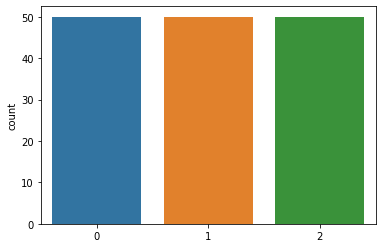

In [9]:
sns.countplot(y)
plt.show()

#### Observation: The dataset is balanced dataset, so we can move forward.

### Data Visualization Using Various Features:

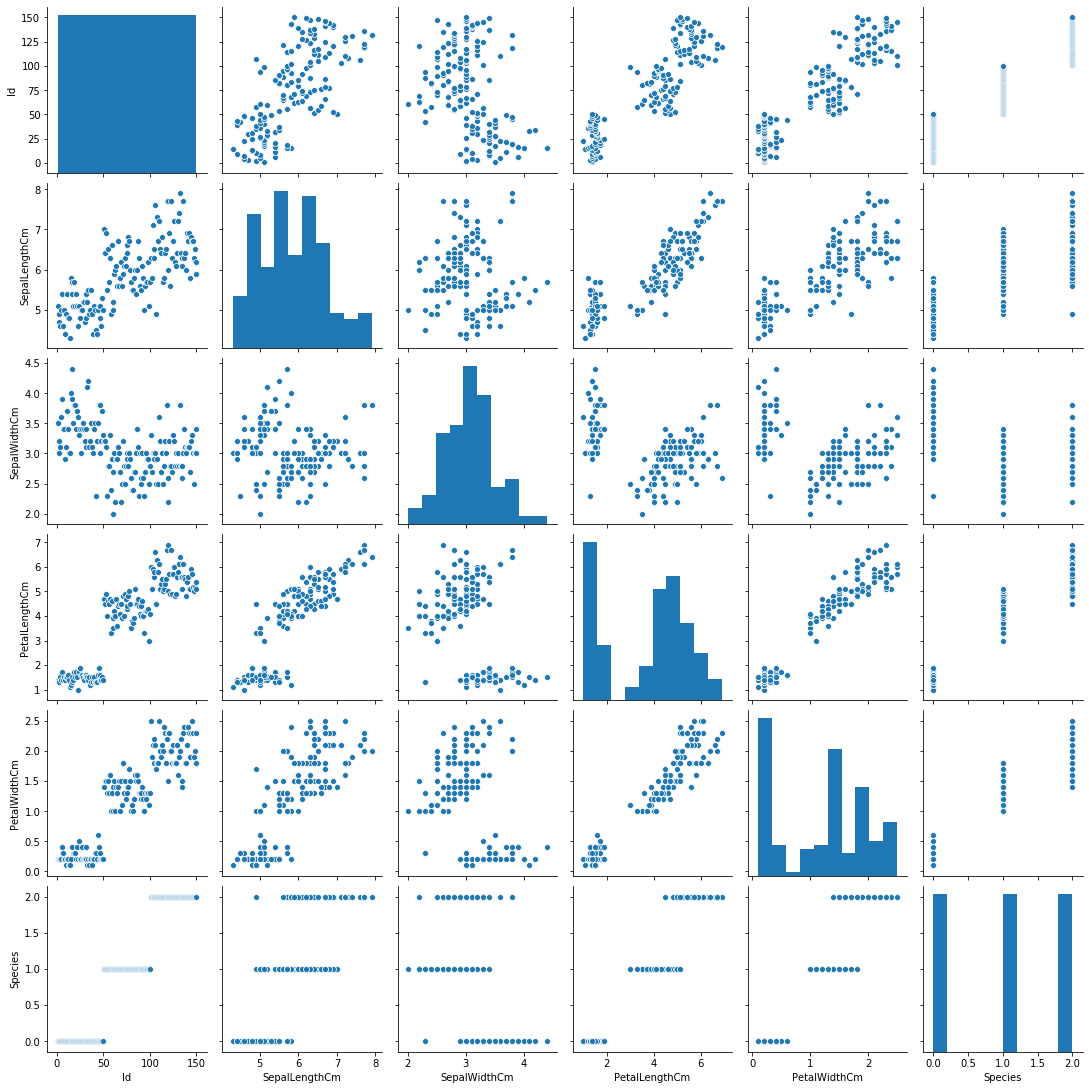

In [10]:
# Input data Visualization
sns.pairplot(data)

Splitting Our Data:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Building a Decision Tree Classifier:


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

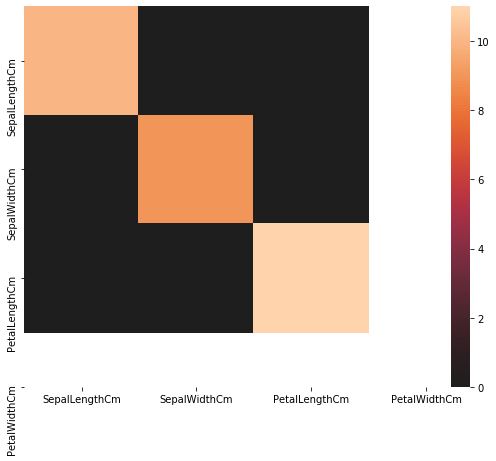

In [19]:
from sklearn import metrics
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = data.iloc[:, 1:5].columns.values,  yticklabels = data.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [30]:
# Model Accuracy:

y_pred = model.predict(X_test)
print("Accuracy:",sm.accuracy_score(y_test, y_pred))
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


The accuracy of this model is 1 or 100% since I have taken all the 4 features of the iris dataset for creating the decision tree model.

### Visualizing The Decision Tree:

In [31]:
from sklearn import tree

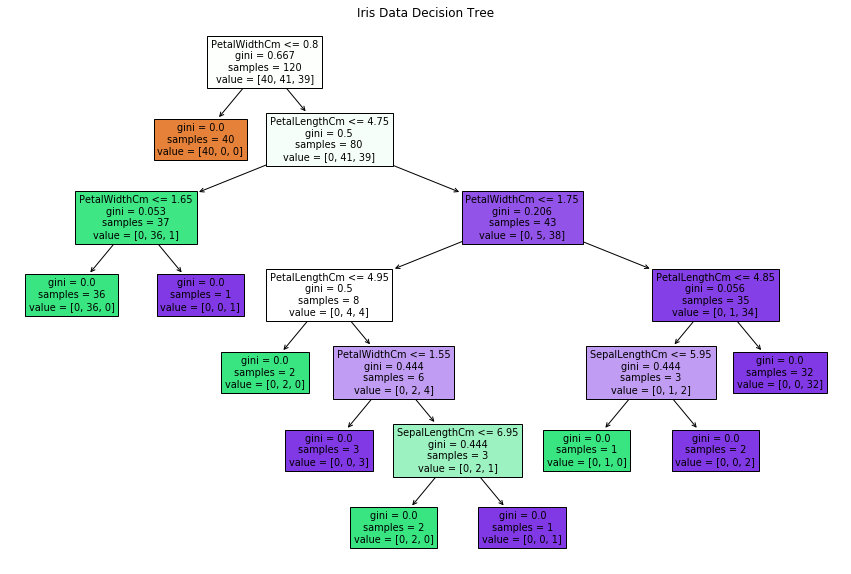

In [32]:
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

### Predicting the class output for some random values of petal and sepal length and width:

In [38]:
print("Class Names = ",data.Species.unique())

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',model.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  [0 1 2]

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


### Conclusion: I was able to successfully carry-out Prediction Using Decision Tree Algorithm and able to evaluate the model's accuracy score and also visulizes the decision tree.

### Thank You